In [33]:
import xarray as xr
import py12box
from pyprojroot import here
import pandas as pd
import utils
from scipy.optimize import curve_fit
import numpy as np

Write file of monthly baseline obs:

In [13]:
utils.obs_write("CFC-11", here() / "data/example", "CFC-11")

... reading /work/chxmr/shared/obs/MHD/AGAGE-GCECD_MHD_19940217_cfc11-20200928.nc
... reading /work/chxmr/shared/obs/ZEP/AGAGE-GCMSMedusa_ZEP_20100902_cfc11-20200928.nc
... reading /work/chxmr/shared/obs/THD/AGAGE-GCECD_THD_19950930_cfc11-20200928.nc
... reading /work/chxmr/shared/obs/JFJ/AGAGE-GCMSMedusa_JFJ_20080418_cfc11-20200928.nc
... reading /work/chxmr/shared/obs/RPB/AGAGE-GCECD_RPB_19960607_cfc11-20200928.nc
... reading /work/chxmr/shared/obs/SMO/AGAGE-GCECD_SMO_19960817_cfc11-20200928.nc
... reading /work/chxmr/shared/obs/CGO/AGAGE-GCECD_CGO_19930811_cfc11-70m-20200427.nc
... reading /work/chxmr/shared/obs/CGO/AGAGE-GCECD_CGO_19930810_cfc11-10m-20200427.nc


Read file:

In [27]:
df = utils.obs_read("CFC-11", here() / "data/example", "CFC-11")
df

site               MHD                                         ZEP  \
box                  0                                           0   
var                 mf mf_repeatability mf_variability          mf   
1993-08-01         NaN              NaN            NaN         NaN   
1993-09-01         NaN              NaN            NaN         NaN   
1993-10-01         NaN              NaN            NaN         NaN   
1993-11-01         NaN              NaN            NaN         NaN   
1993-12-01         NaN              NaN            NaN         NaN   
...                ...              ...            ...         ...   
2020-05-01  224.614801         0.218556       0.442562  225.217200   
2020-06-01  224.527293         0.219398       0.457956  224.347496   
2020-07-01  223.748795         0.229288       0.333577  199.393204   
2020-08-01  223.429401         0.222830       0.517098  223.547400   
2020-09-01  223.295401         0.215719       0.490352  223.231003   

site                                               THD                   \
box                                                  0                    
var        mf_repeatability mf_variability          mf mf_repeatability   
1993-08-01              NaN            NaN         NaN              NaN   
1993-09-01              NaN            NaN         NaN              NaN   
1993-10-01              NaN            NaN         NaN              NaN   
1993-11-01              NaN            NaN         NaN              NaN   
1993-12-01              NaN            NaN         NaN              NaN   
...                     ...            ...         ...              ...   
2020-05-01         0.312359       0.349495  224.537994         0.223564   
2020-06-01         0.615202       0.814221  224.335602         0.253399   
2020-07-01         0.649185      11.911754  223.843002         0.236751   
2020-08-01         0.404281       0.424264  223.488998         0.195297   
2020-09-01         0.483707       0.558613  223.462805         0.229252   

site                              JFJ  ...                        RPB  \
box                                 0  ...                          1   
var        mf_variability          mf  ... mf_variability          mf   
1993-08-01            NaN         NaN  ...            NaN         NaN   
1993-09-01            NaN         NaN  ...            NaN         NaN   
1993-10-01            NaN         NaN  ...            NaN         NaN   
1993-11-01            NaN         NaN  ...            NaN         NaN   
1993-12-01            NaN         NaN  ...            NaN         NaN   
...                   ...         ...  ...            ...         ...   
2020-05-01       0.273684  224.252502  ...       0.625978  224.426395   
2020-06-01       0.266317  224.131998  ...       0.736967  224.043503   
2020-07-01       0.248475  223.784799  ...       0.563321  223.905603   
2020-08-01       0.273299  223.378198  ...       0.598089  223.607701   
2020-09-01       0.307461  223.634003  ...       0.697665  223.202396   

site                                       SMO                   \
box                                          2                    
var        mf_repeatability mf_variability  mf mf_repeatability   
1993-08-01              NaN            NaN NaN              NaN   
1993-09-01              NaN            NaN NaN              NaN   
1993-10-01              NaN            NaN NaN              NaN   
1993-11-01              NaN            NaN NaN              NaN   
1993-12-01              NaN            NaN NaN              NaN   
...                     ...            ...  ..              ...   
2020-05-01         0.242472       0.260080 NaN              NaN   
2020-06-01         0.214673       0.326628 NaN              NaN   
2020-07-01         0.215711       0.351681 NaN              NaN   
2020-08-01         0.194447       0.256081 NaN              NaN   
2020-09-01         0.162168       0.447504 NaN              NaN   

site  

Plot mole fraction columns

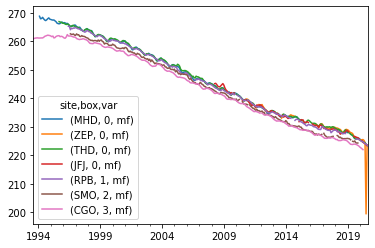

In [28]:
idx = pd.IndexSlice
df.loc[:, idx[:, :, "mf"]].plot()

In [55]:
sites = set([c[0] for c in df.columns])

In [66]:
len(wh_finite)

1

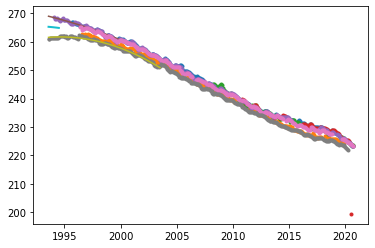

In [71]:
import matplotlib.pyplot as plt

def f(x, a, b, c):
    return a + b*x + c*x**2

x = utils.decimal_date(df.index)
wh_first = np.where(x < x[0] + 10.)
x_first = x[wh_first]

global_mean_y1 = np.zeros(12)
global_mean_count = 0

for s in sites:
    y = np.squeeze(df.loc[:, idx[s, :, "mf"]].values)

    plt.plot(x, y, '.')
    
    y_first = y[wh_first]
    
    wh_finite = np.where(np.isfinite(y_first))
    
    if len(wh_finite[0]) > 0:
        if wh_finite[0][0] < 24:
            x_finite = x_first[wh_finite]
            y_finite = y_first[wh_finite]

            fit_params, pcov = curve_fit(f, x_finite, y_finite)
            
            global_mean_y1 += f(x_first[0:12], *fit_params)
            global_mean_count += 1
            
            plt.plot(x_first, f(x_first, *fit_params))
    
global_mean_y1 /= global_mean_count

plt.plot(x_first[0:12], global_mean_y1, linewidth = 2.)

global_ic = global_mean_y1[0]
global_ic_trend = global_mean_y1[11] - global_mean_y1[0]

lifetime = 50.
Matm = 5.1170001e+21 / 28.97
mol_mass = 137.

q0 = Matm * (global_ic_trend + global_ic / lifetime) / 1e12 * mol_mass / 1e12

In [22]:
df.loc[:, idx["MHD", :, "mf"]]

site,MHD
box,0
var,mf
1993-08-01,NaN
1993-09-01,NaN
1993-10-01,NaN
1993-11-01,NaN
1993-12-01,NaN
...,...
2020-05-01,224.614801
2020-06-01,224.527293
